In [1]:
import torch.utils
import torchvision
from torchvision import transforms
import numpy as np
import pickle
from PIL import Image
import matplotlib.pyplot as plt
import torch
from random import choices
from models import Discriminator, Generator


In [2]:

def gen_z(batch_size, discrete_latent_dim, categorical_dim, continuous_latent_dim):
    cont_z = torch.randn(batch_size,continuous_latent_dim)
    rand_places = torch.tensor(choices(range(categorical_dim), k=batch_size*discrete_latent_dim)).reshape(batch_size,-1)
    disc_z = torch.zeros(batch_size,discrete_latent_dim,categorical_dim)
    for i in range(batch_size):
        disc_z[i,torch.arange(discrete_latent_dim),rand_places[i]] = 1
    return torch.cat([cont_z,disc_z.reshape(batch_size,-1)],dim=1).reshape(batch_size,categorical_dim*discrete_latent_dim+continuous_latent_dim,1,1)

In [18]:

discrete_latent_dim = 10
categorical_dim =  2
continuous_latent_dim = 10
len_z = discrete_latent_dim*categorical_dim + continuous_latent_dim


generator = Generator(len_z)
generator.load_state_dict(torch.load('generator_epoch:119.pkl', map_location=lambda storage, loc: storage))
generator.eval()

Generator(
  (net): Sequential(
    (0): ConvTranspose2d(30, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Dropout(p=0.2, inplace=False)
    (4): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.2)
    (7): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.2)
    (10): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): LeakyReLU(negative_slope=0.2)
    (13): ConvTranspose2d(64, 3, kern

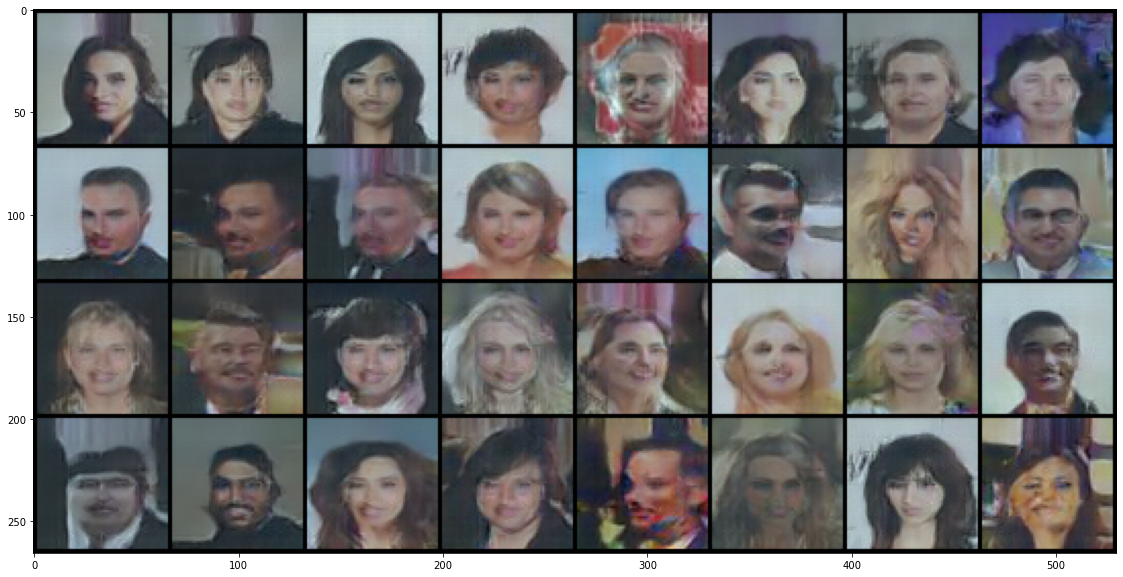

In [19]:
z = gen_z(32, discrete_latent_dim, categorical_dim, continuous_latent_dim)
fake_images = generator(z)
grid_fake = torchvision.utils.make_grid(fake_images[:32], normalize=True)
plt.figure(figsize=(20,10))
plt.imshow(np.transpose(grid_fake.cpu().detach().numpy(), (1,2,0)))


<ipython-input-40-94d14e0852d5>:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 2160x1440 with 0 Axes>

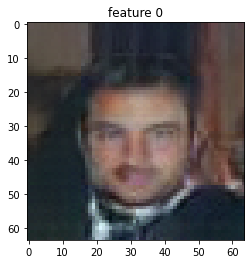

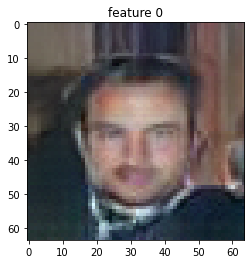

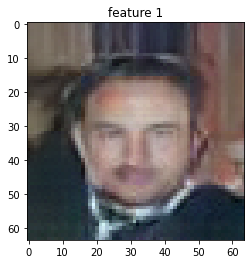

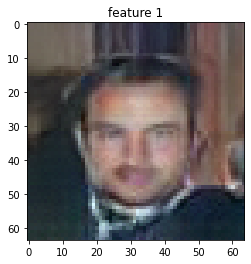

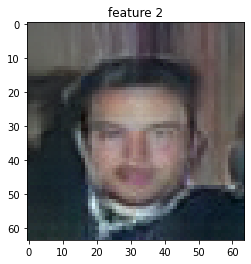

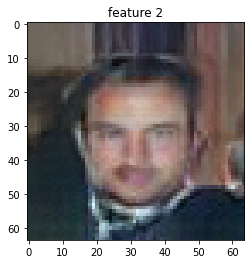

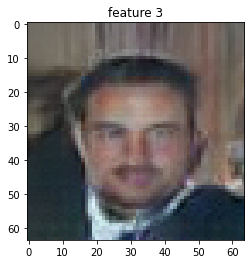

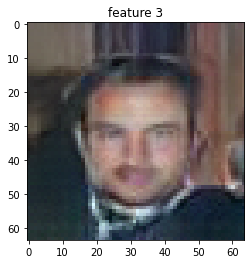

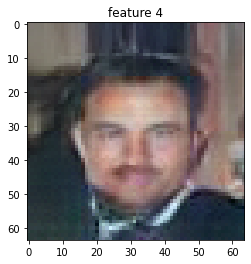

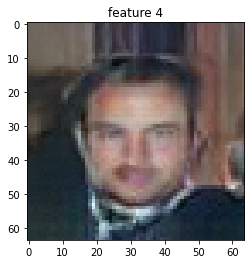

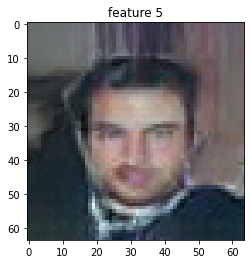

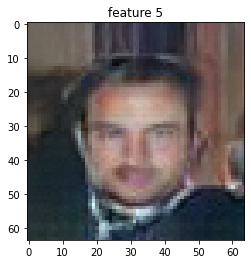

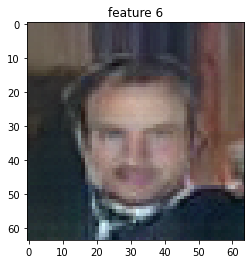

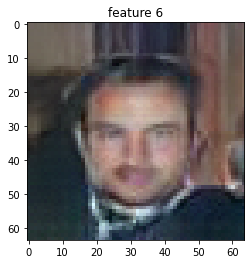

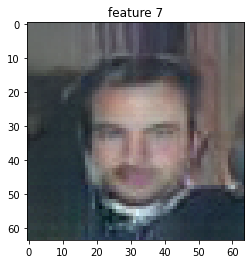

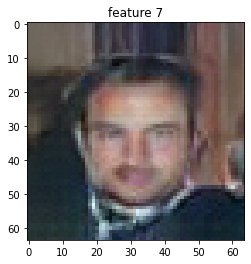

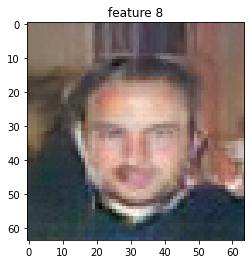

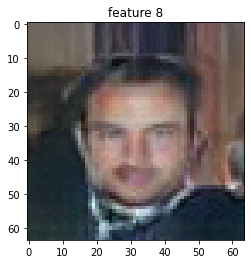

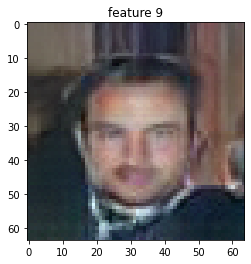

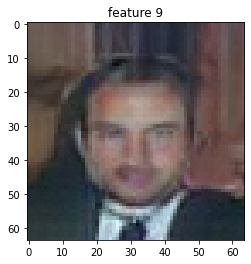

In [40]:
batch_size = 1
z = gen_z(batch_size, discrete_latent_dim, categorical_dim, continuous_latent_dim).view(batch_size,-1)
plt.figure(figsize=(30,20))
for i in range(discrete_latent_dim):
    if i==0:
        plt.figure()
        for j in range(batch_size):
            z[j,-2:] = torch.tensor([1., 0.])
        fake_images = generator(z.reshape(batch_size,len_z,1,1))
        grid_fake = torchvision.utils.make_grid(fake_images, normalize=True)
        plt.title(f"feature {i}")
        plt.imshow(np.transpose(grid_fake.cpu().detach().numpy(), (1,2,0)))
        plt.clf

        plt.figure()
        for j in range(batch_size):
            z[j,-2:] = torch.tensor([0., 1.])
        fake_images = generator(z.reshape(batch_size,len_z,1,1))
        grid_fake = torchvision.utils.make_grid(fake_images, normalize=True)
        plt.title(f"feature {i}")
        plt.imshow(np.transpose(grid_fake.cpu().detach().numpy(), (1,2,0)))
        plt.clf
        continue
        
    plt.figure()
    for j in range(batch_size):
        z[j,-(2*(i+1)):-(2*(i))] = torch.tensor([1., 0.])
    fake_images = generator(z.reshape(batch_size,len_z,1,1))
    grid_fake = torchvision.utils.make_grid(fake_images, normalize=True)
    plt.title(f"feature {i}")
    plt.imshow(np.transpose(grid_fake.cpu().detach().numpy(), (1,2,0)))
    plt.clf
    
    plt.figure()
    for j in range(batch_size):
        z[j,-(2*(i+1)):-(2*(i))] = torch.tensor([0., 1.])
    fake_images = generator(z.reshape(batch_size,len_z,1,1))
    grid_fake = torchvision.utils.make_grid(fake_images, normalize=True)
    plt.title(f"feature {i}")
    plt.imshow(np.transpose(grid_fake.cpu().detach().numpy(), (1,2,0)))
    plt.clf



<ipython-input-83-e27c0961ebfa>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30,20))


<Figure size 2160x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

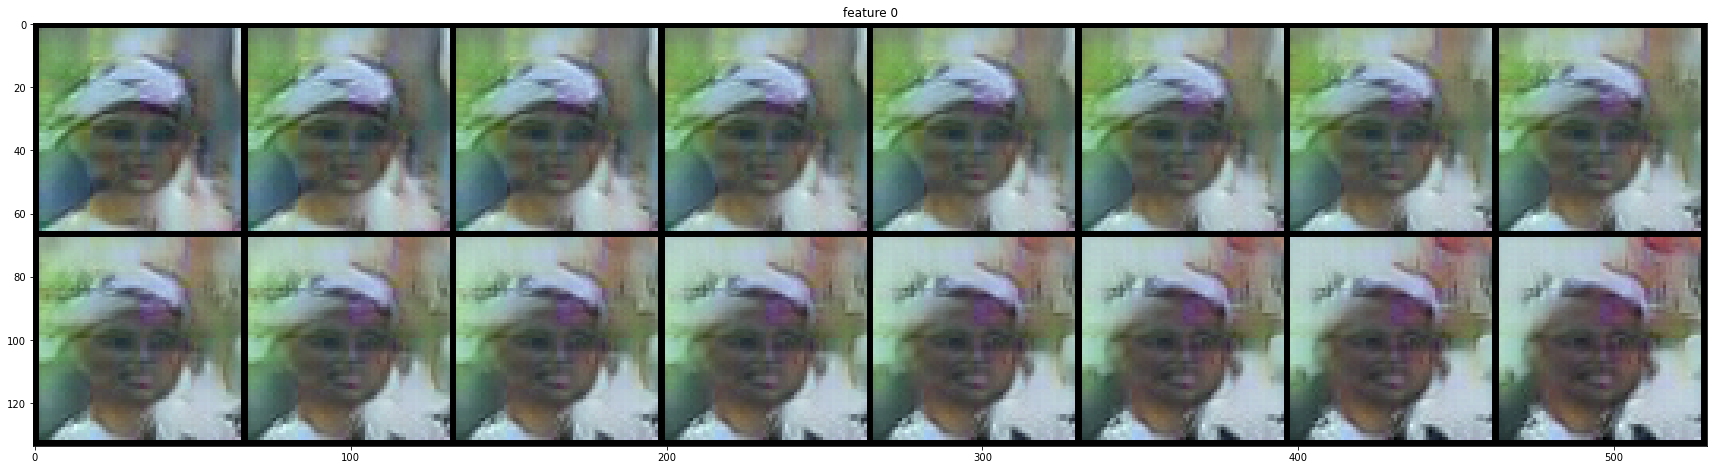

<Figure size 432x288 with 0 Axes>

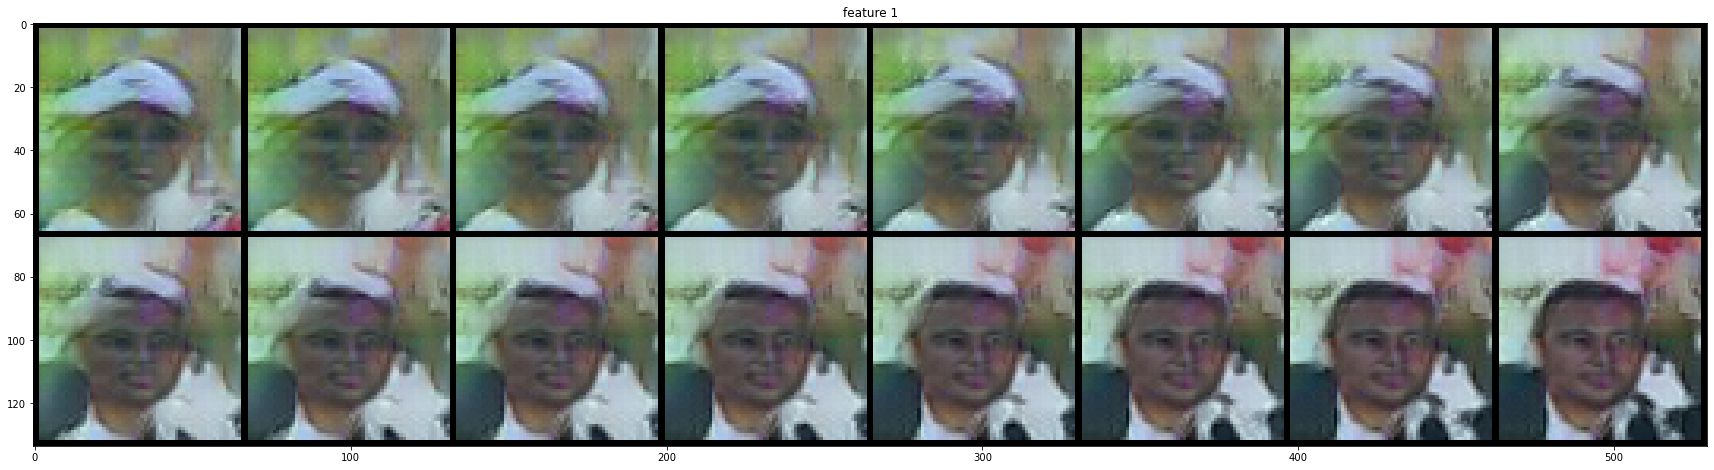

<Figure size 432x288 with 0 Axes>

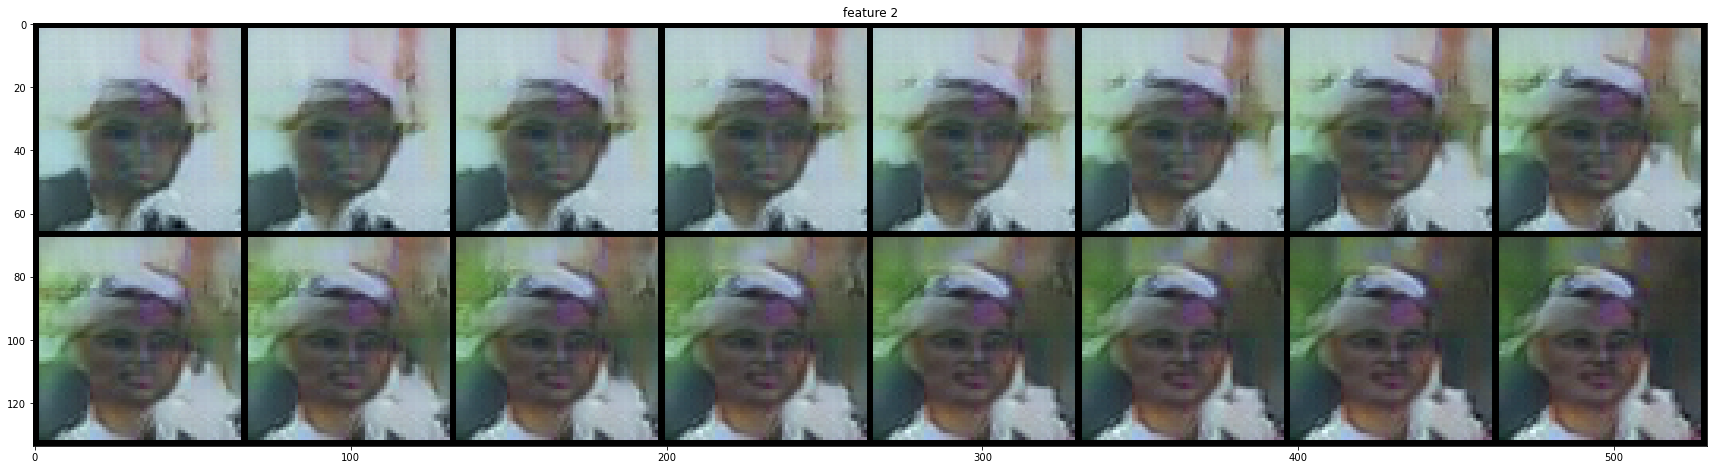

<Figure size 432x288 with 0 Axes>

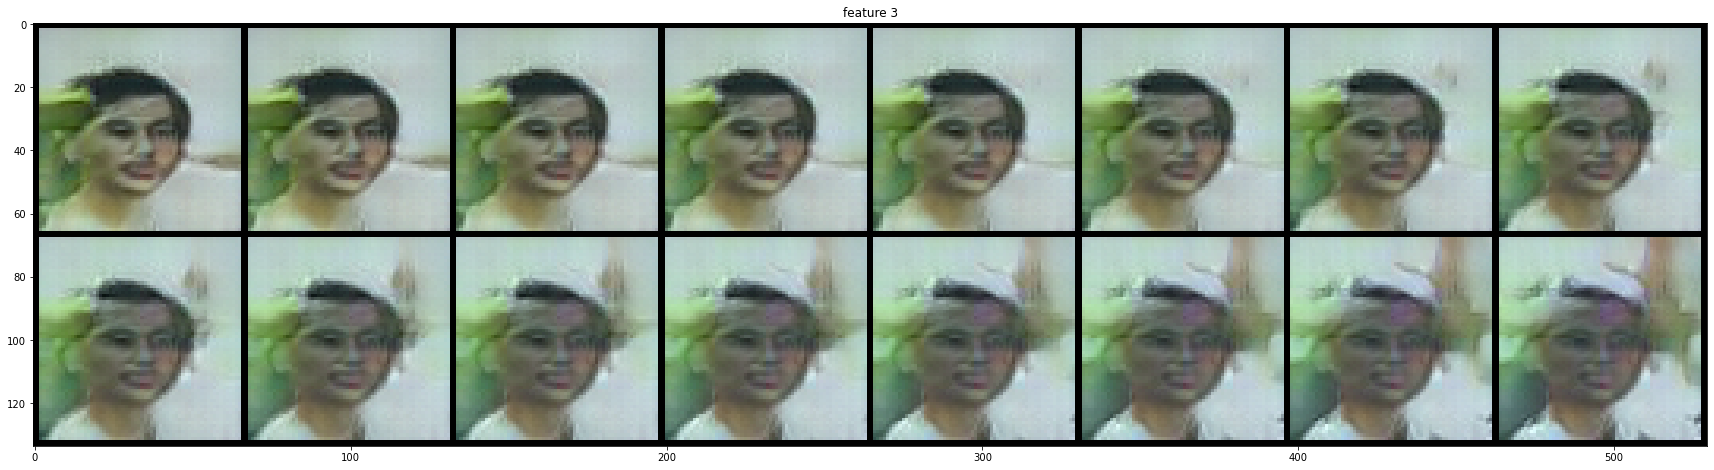

<Figure size 432x288 with 0 Axes>

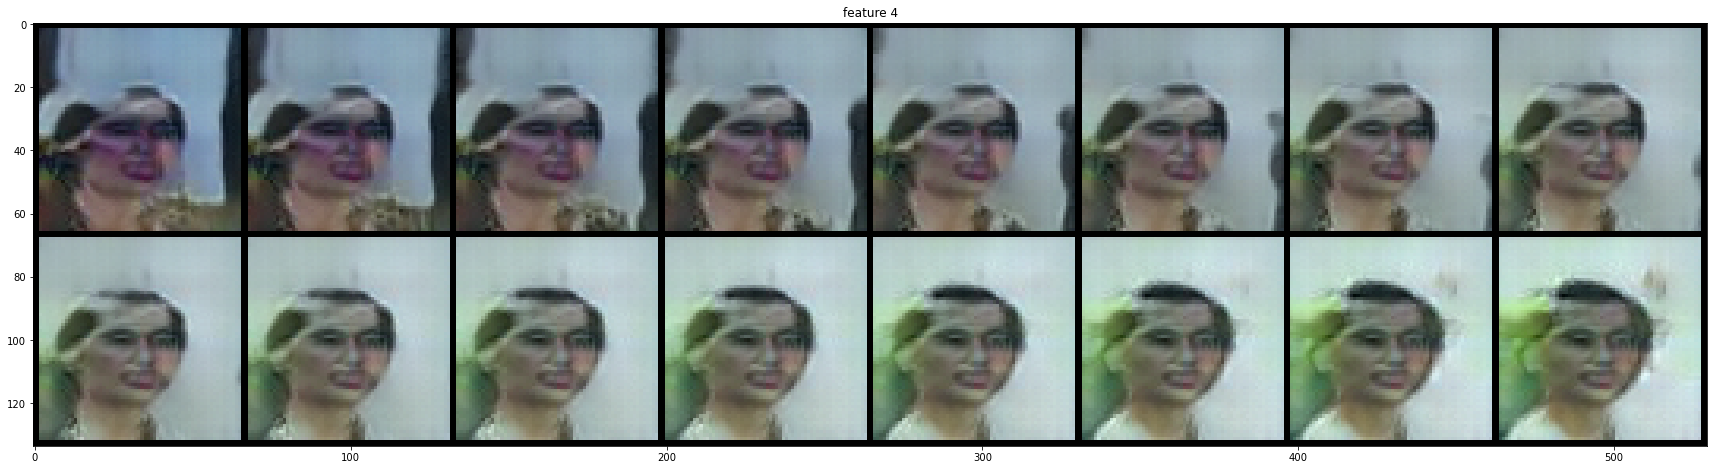

<Figure size 432x288 with 0 Axes>

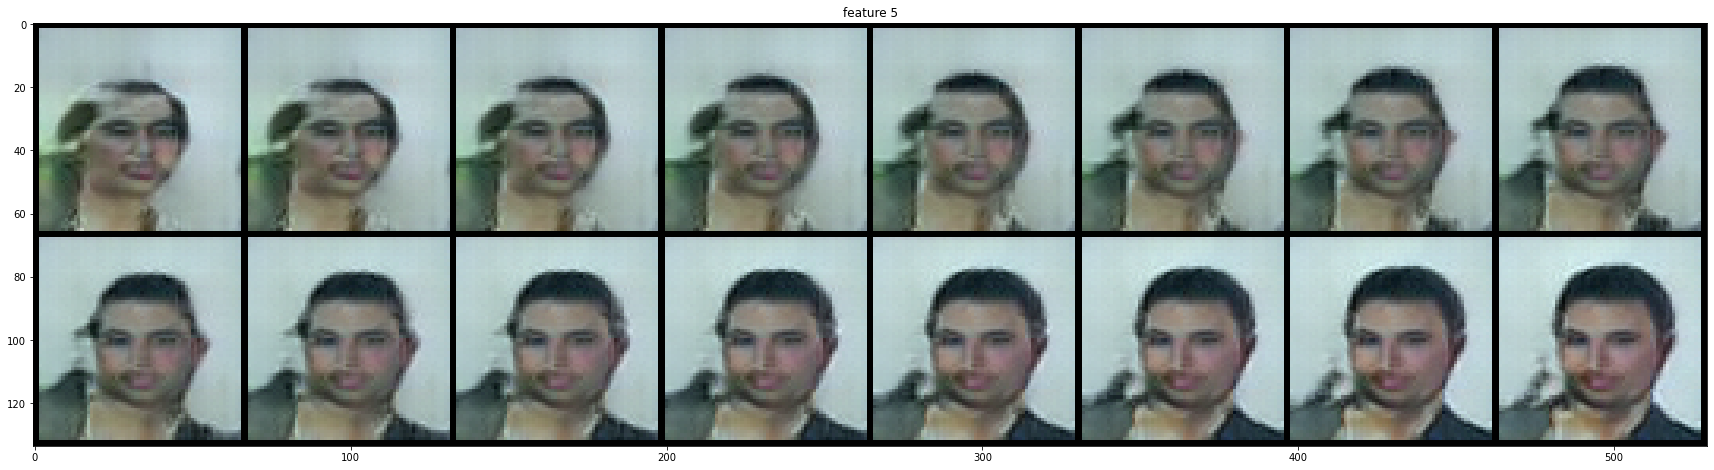

<Figure size 432x288 with 0 Axes>

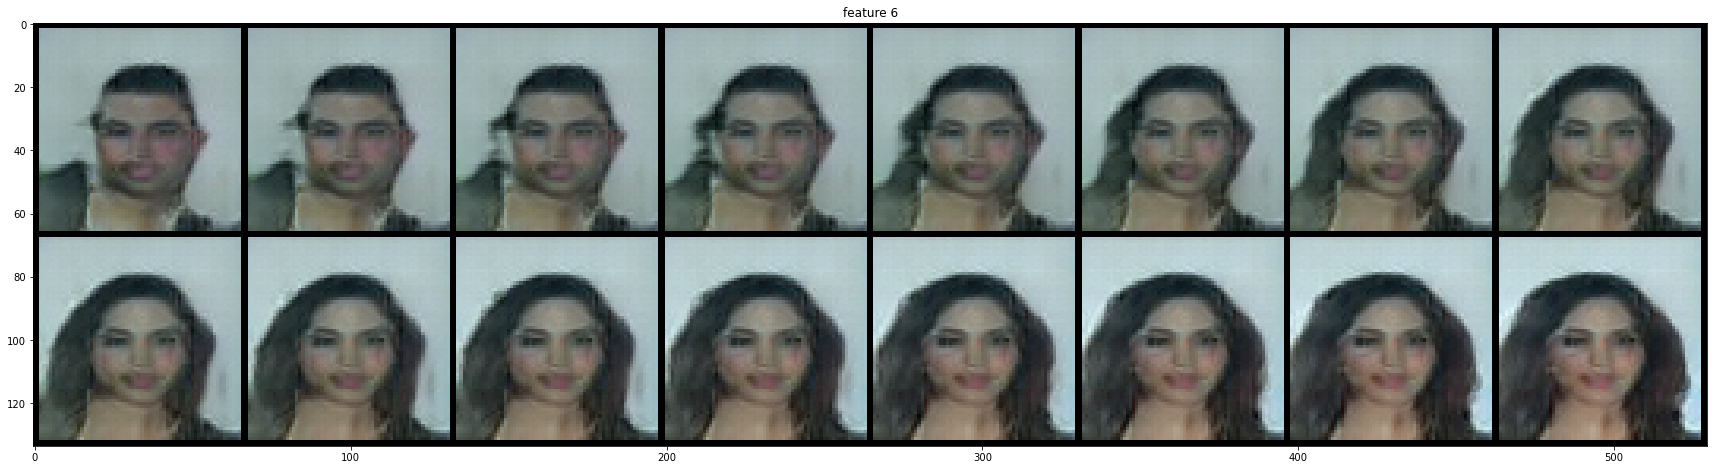

<Figure size 432x288 with 0 Axes>

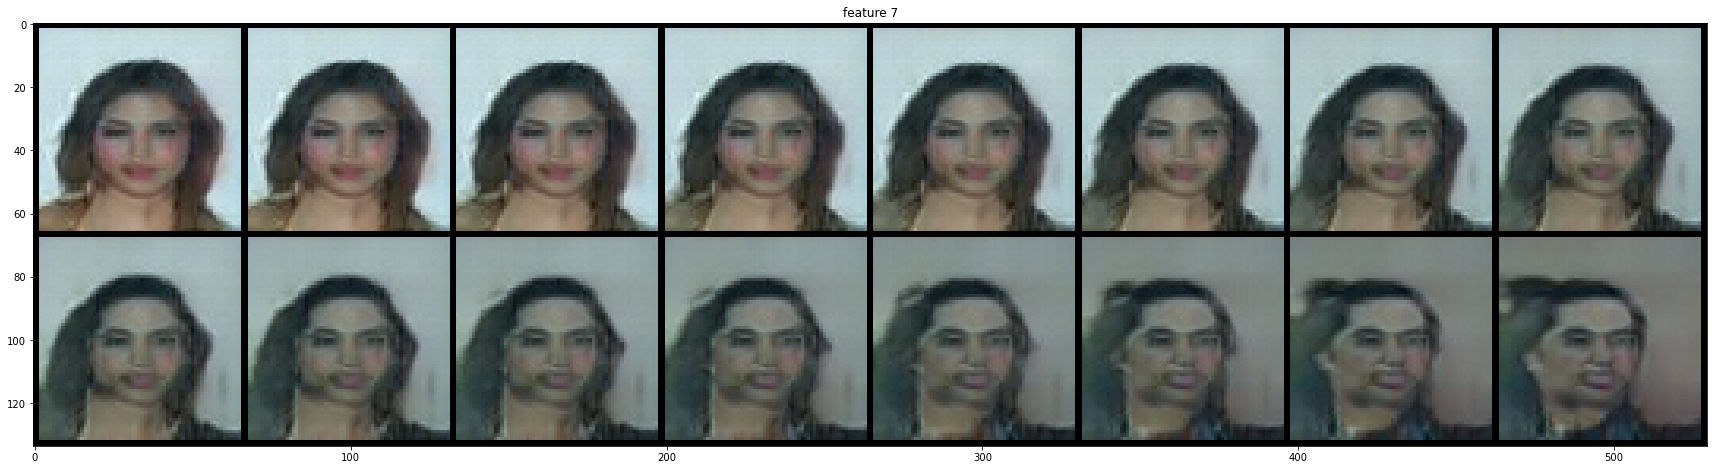

<Figure size 432x288 with 0 Axes>

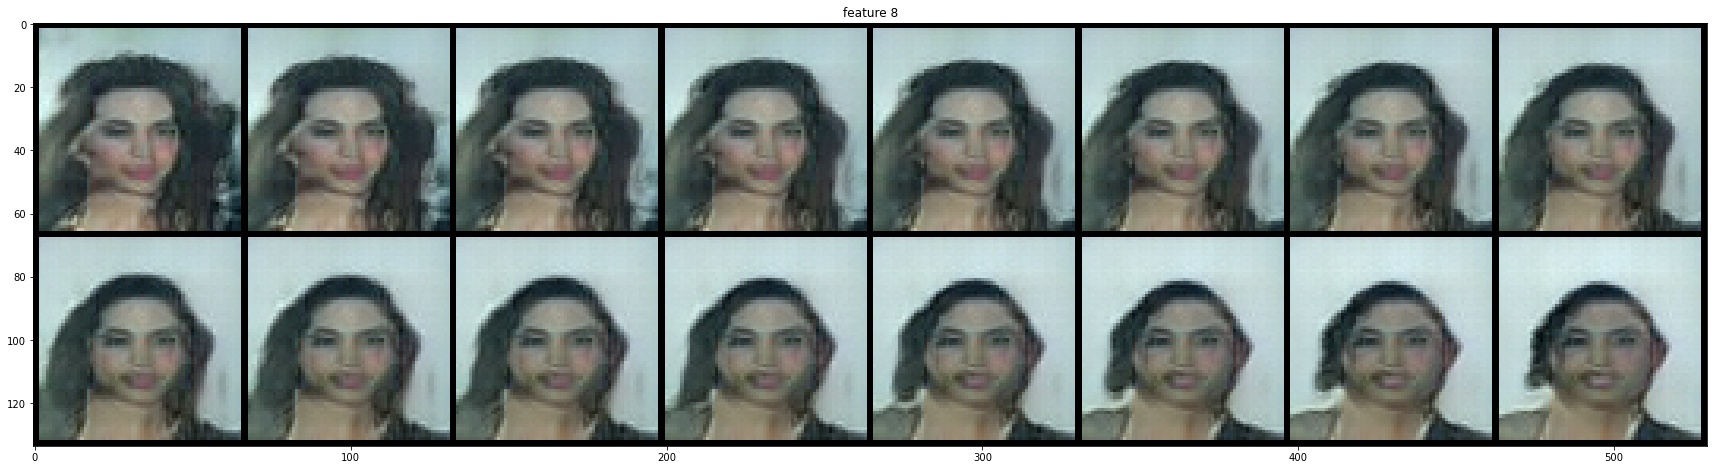

<Figure size 432x288 with 0 Axes>

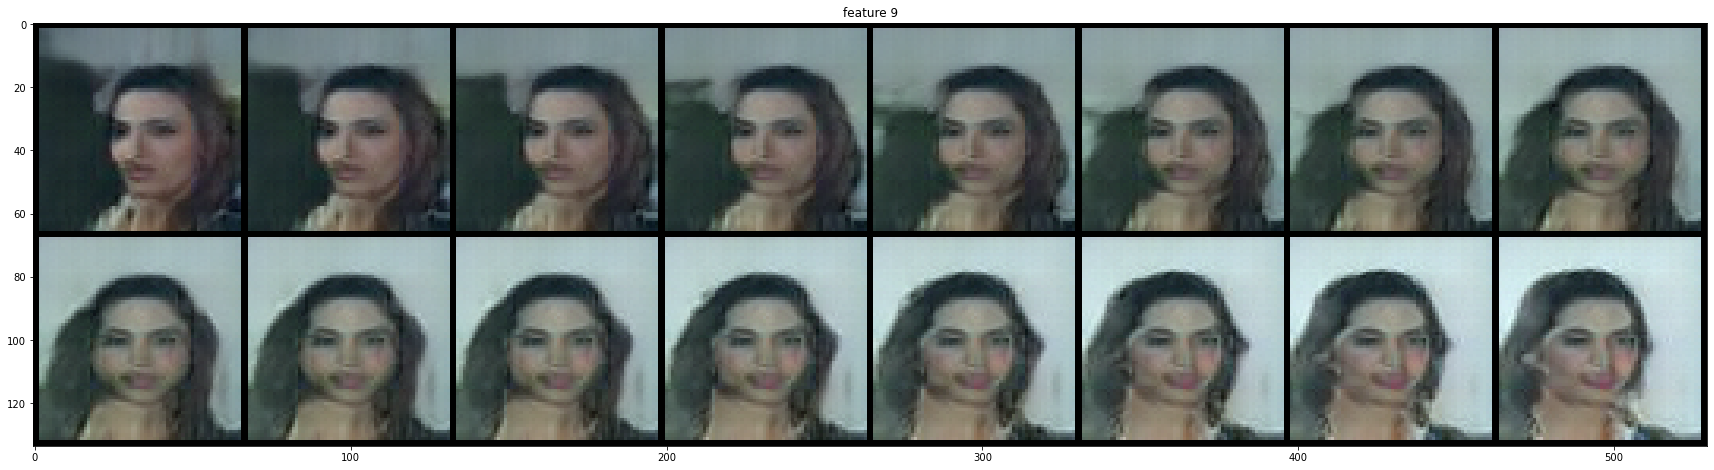

In [83]:
batch_size = 1
z = gen_z(batch_size, discrete_latent_dim, categorical_dim, continuous_latent_dim).view(batch_size,-1)
plt.figure(figsize=(30,20))
for i in range(continuous_latent_dim):
    imgs = []
    for j, value_checked in enumerate(np.linspace(-1.5,1.5, 16)):
        z[0,i] = value_checked
        fake_images = generator(z.reshape(batch_size,len_z,1,1))
        imgs.append(fake_images)
    z[0,i] = 0
    plt.figure()
    plt.figure(figsize=(30,20))
    plt.title(f"feature {i}")


    imgs = torch.cat(imgs)
    imgs = torchvision.utils.make_grid(imgs, normalize=True)
    plt.imshow(np.transpose(imgs.cpu().detach().numpy(), (1,2,0)))
    plt.clf

